In [46]:
import time
from copy import deepcopy

import IPython.display as IPd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

import stg_energy.fig2_histograms.viz as viz
from pyloric.sbi_wrapper import get_time, simulate_energyscape
from stg_energy.common import col, svg
from stg_energy.fig2_histograms.energy import select_ss_close_to_obs

# Figure 2

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
PANEL_STG = "svg/panel_stg.svg"
PANEL_A = "svg/panel_a.svg"
PANEL_B = "svg/panel_b.svg"
PANEL_C1 = "svg/panel_c1.svg"
PANEL_C2 = "svg/panel_c2.svg"
PANEL_D1 = "svg/panel_d1.svg"
PANEL_D2 = "svg/panel_d2.svg"

PANEL_C1_supp = "svg/panel_c1_supp.svg"
PANEL_C2_supp = "svg/panel_c2_supp.svg"
PANEL_D1_supp = "svg/panel_d1_supp.svg"
PANEL_D2_supp = "svg/panel_d2_supp.svg"

In [49]:
outfile = "../../results/11deg_post_pred/11_deg_post_pred.npz"
data_n = np.load(outfile)
sample_seeds = data_n["seeds"]
sample_params = data_n["params"]
sample_stats = data_n["stats"]
print("There are", len(sample_seeds), "datapoints in this dataset")

There are 1124507 datapoints in this dataset


### Load prior simulations for getting the std and mean of summstats

In [50]:
datafile = "../../results/prior_samples_after_classifier/samples_full_3.npz"
data = np.load(datafile)

params = data["params"]
stats = data["stats"]
seeds = data["seeds"]

stats_mean = np.mean(stats, axis=0)
stats_std = np.std(stats, axis=0)

### Load experimental data

In [51]:
npz = np.load("../../results/experimental_data/summstats_prep845_082_0044.npz")
observation = npz["summ_stats"]

npz = np.load("../../results/experimental_data/trace_data_845_082_0044.npz")
t = npz["t"]

### Select only the ones that are close to the observation

In [52]:
num_std = np.asarray(
    [0.02, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
)

In [53]:
good_params, good_dat, good_seeds = select_ss_close_to_obs(
    sample_params,
    sample_stats,
    sample_seeds,
    observation,
    num_std=num_std,
    stats_std=stats_std[:15],
)

In [54]:
sample_stats = good_dat
sample_params = good_params
sample_seeds = good_seeds

# Panel A: Histogram for total energy

In [55]:
all_energies_per_spike = sample_stats[:, 18:21]
all_total_energies = sample_stats[:, 21:24]

In [56]:
summed_energies_per_spike = np.sum(np.asarray(all_energies_per_spike), axis=1)
summed_energies_total = np.sum(np.asarray(all_total_energies), axis=1)

<ipython-input-57-abc4e5c32141>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['$\;$0', '200$\;\;\;\;$ '])


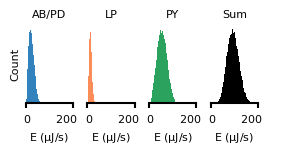

In [57]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 4, figsize=(3.0, 1))

    # The factor /4000 comes from: 0.025ms stepsize -> total energy = int_energy = energy * 0.025ms = energy / 40000
    # But then, we have x1000 because all our currents are given in /cm**2. Thus, we have to multiply with 10,000 to obtain nano-Joule.
    # We say that our units are in micro-Joule, hence divide by 1000.
    # Lastly, divide by 10 because 10 second recording
    # This gives us: /40000 * 10000 / 1000 / 10 = /40000
    _ = ax[0].hist(
        all_total_energies[:, 0] / 40000, range=[0, 200], bins=100, color="#3182bd"
    )
    ax[0].set_ylabel("Count")
    ax[0].tick_params(axis="both", which="major")
    ax[0].spines["top"].set_visible(False)
    ax[0].spines["right"].set_visible(False)
    ax[0].spines["left"].set_visible(False)
    ax[0].axes.get_yaxis().set_ticks([])
    ax[0].set_title("AB/PD")

    _ = ax[1].hist(
        all_total_energies[:, 1] / 40000, range=[0, 200], bins=100, color="#fc8d59"
    )
    # ax[1].set_ylabel('Count')
    ax[1].tick_params(axis="both", which="major")
    ax[1].spines["top"].set_visible(False)
    ax[1].spines["right"].set_visible(False)
    ax[1].spines["left"].set_visible(False)
    ax[1].axes.get_yaxis().set_ticks([])
    ax[1].set_title("LP")

    _ = ax[2].hist(
        all_total_energies[:, 2] / 40000, range=[0, 200], bins=100, color="#2ca25f"
    )
    # ax[2].set_ylabel('Count')
    ax[2].tick_params(axis="both", which="major")
    ax[2].spines["top"].set_visible(False)
    ax[2].spines["right"].set_visible(False)
    ax[2].spines["left"].set_visible(False)
    ax[2].axes.get_yaxis().set_ticks([])
    ax[2].set_title("PY")

    _ = ax[3].hist(summed_energies_total / 40000, range=[0, 200], bins=100, color="k")
    # ax[3].set_ylabel('Count')
    ax[3].tick_params(axis="both", which="major")
    ax[3].spines["top"].set_visible(False)
    ax[3].spines["right"].set_visible(False)
    ax[3].spines["left"].set_visible(False)
    ax[3].axes.get_yaxis().set_ticks([])
    ax[3].set_title("Sum")

    plt.subplots_adjust(wspace=0.3)

    for i in range(4):
        ax[i].set_xlim([0, 200])
        ax[i].set_xticklabels(['$\;$0', '200$\;\;\;\;$ '])
        ax[i].spines["top"].set_visible(False)
        ax[i].spines["right"].set_visible(False)
        ax[i].spines["left"].set_visible(False)
        ax[i].set_xlabel("E ($\mu$J/s)")
        ax[i].set_xticks([0, 200])

    plt.savefig(PANEL_A, facecolor="None", transparent=True)
    plt.show()

<ipython-input-110-0b7fe548b0c9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$\;$21', '175$\;\;\;\;\;\;$ '])


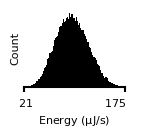

In [110]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.3, 1))

    _ = ax.hist(summed_energies_total / 40000, range=[21, 189], bins=100, color="k")
    # ax[3].set_ylabel('Count')
    ax.tick_params(axis="both", which="major")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.axes.get_yaxis().set_ticks([])

    ax.set_xlim([21, 175])
    ax.set_xticklabels(['$\;$21', '175$\;\;\;\;\;\;$ '])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xlabel("Energy ($\mu$J/s)")
    ax.set_xticks([21, 175])
    ax.set_ylabel("Count", labelpad=3)
    
#     ax.arrow(22, 800, 0, -500, head_width=15, head_length=200, facecolor='k')
#     ax.arrow(168, 800, 0, -500, head_width=15, head_length=200, facecolor='k')
#     ax.text(147, 900, '189')
#     ax.text(6, 900, '21')

    plt.savefig(PANEL_A, facecolor="None", transparent=True)
    plt.show()